# CM2604 Machine Learning Coursework
### S.C. Thennakoon | IIT - 20232005 | RGU - 2330960

## Data Preprocessing

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Data Collection and Cleaning

On initial glance the csv files are seperated with `;` instead of `,`. And there happens to be seperated `bank` and `bank-addtional` files 

In [49]:
bank = pd.read_csv("bank+marketing/bank/bank.csv", sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [50]:
bank_full = pd.read_csv("bank+marketing/bank/bank-full.csv", sep=';')
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [51]:
bank_additional = pd.read_csv("bank+marketing/bank-additional/bank-additional.csv", sep=';')
bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [52]:
bank_additional_full = pd.read_csv("bank+marketing/bank-additional/bank-additional-full.csv", sep=';')
bank_additional_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [53]:
bank.isna().sum(), bank_full.isna().sum(), bank_additional.isna().sum(), bank_additional_full.isna().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y    

There are no na or null values present in the 4 dataframes

In [54]:
common_rows_bank = bank_full.merge(bank)
common_rows_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
1,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
2,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
3,57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96,5,success,yes
4517,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
4518,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
4519,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes


In [55]:
common_rows_bank_additional = bank_additional_full.merge(bank_additional)
common_rows_bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,55,technician,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
4116,38,housemaid,divorced,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes
4117,32,admin.,married,university.degree,no,yes,no,cellular,nov,wed,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
4118,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


Every row in both of `bank` and `bank-additional` are present in `bank-full` and `bank-additional-full`, the representations are 10% of the original datasets. Therefore we can safely ignore the smaller dataset and proceed with the larger `bank-full` and `bank-additional-full`.

In [56]:
bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

There are additioanl 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' in the `bank-additional` dataset

In [57]:
common_columns = bank_additional_full.columns.intersection(bank_full.columns)
common_columns_dataframe = bank_additional_full[common_columns]
common_columns_dataframe

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


In [58]:
common_rows_bank_all = common_columns_dataframe.merge(bank_full)
common_columns_dataframe

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


Every row in the in `bank-full` is in `bank-additional-full`, Therefore Project will the done with the use of `bank-additional-full` dataset because of more data.

In [59]:
bank_additional_full.drop_duplicates(inplace=True)
bank_additional_full.shape

(41176, 21)

In [107]:
bank_additional_full['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

### Data Visualization and Exploratory Data Analysis

In [60]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [61]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
bank_additional_full['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [63]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


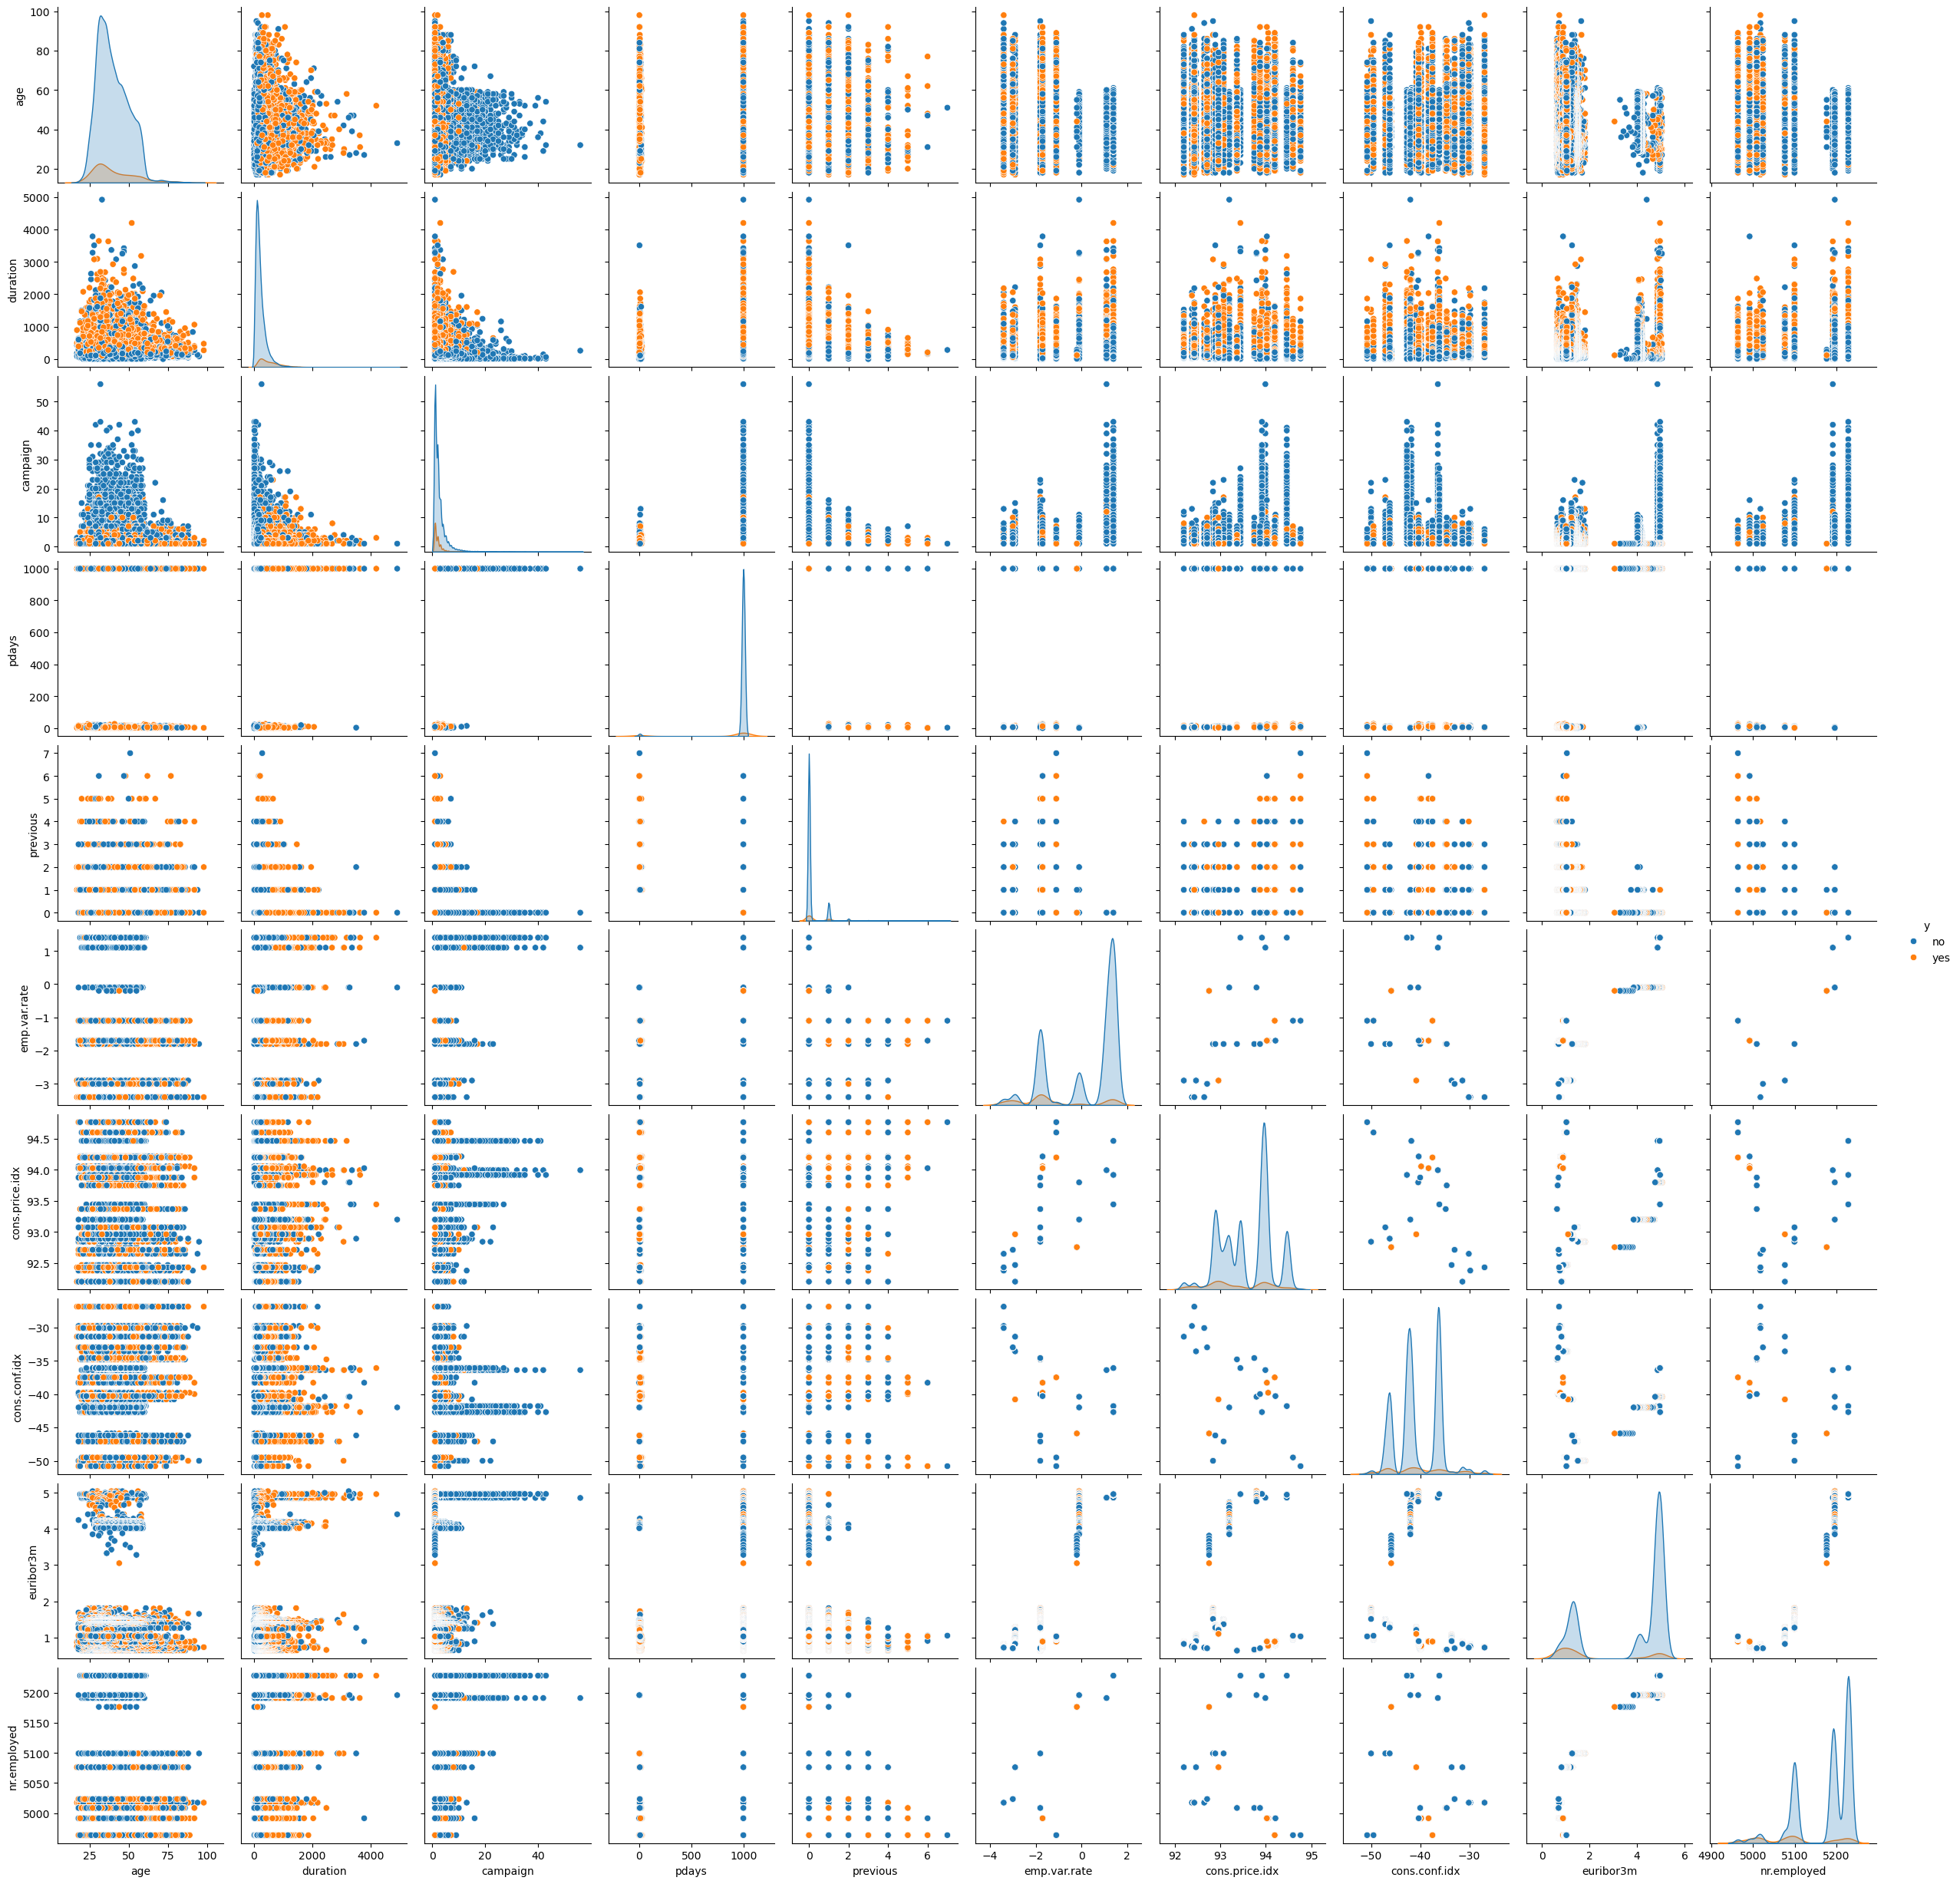

In [64]:
sns.pairplot(bank_additional_full, hue='y')

Data is appeared to be heavily clustered and some outliers can be seen

<Axes: ylabel='duration'>

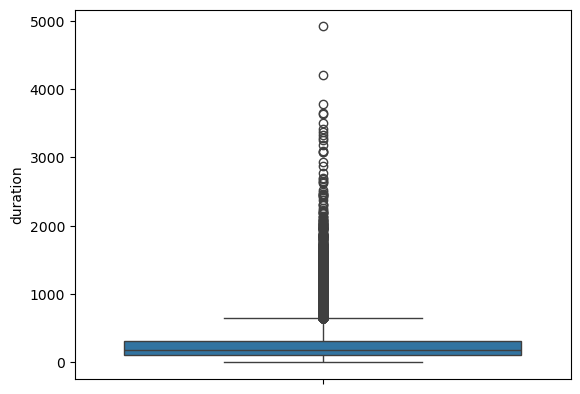

In [66]:
sns.boxplot(bank_additional_full['duration'])

There appears to be some outliers present in the `duration` column (visualized in the box plot above), by using a 0.05 - 0.95 confidence interval we can eleminate the outliers

In [68]:
def remove_outliers_iqr(data:pd.DataFrame, columns):
    data_copy = data.copy()
    for column in columns:
        Q1 = data_copy[column].quantile(0.05)
        Q3 = data_copy[column].quantile(0.95)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_copy.drop(data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)].index, inplace=True)

    return data_copy

<Axes: ylabel='duration'>

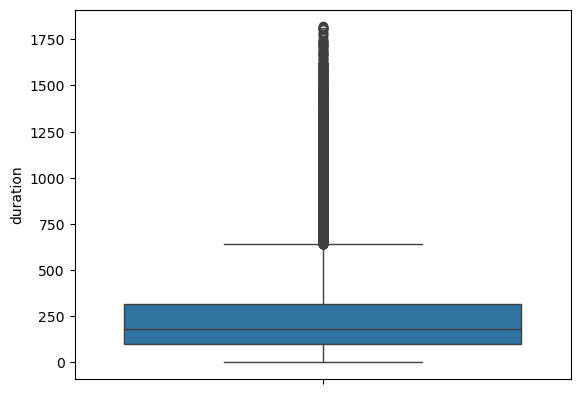

In [69]:
bank_additional_full_rm_outliers = remove_outliers_iqr(bank_additional_full, ['duration'])
sns.boxplot(bank_additional_full_rm_outliers['duration'])

In [72]:
bank_additional_full.shape[0] -bank_additional_full_rm_outliers.shape[0]

93

93 records were removed from the dataset

### Encoding

In [73]:
bank_additional_full_rm_outliers.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
bank_additional_full_encoded = bank_additional_full_rm_outliers.copy()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [83]:
label_encoders = {}
for column in bank_additional_full_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    bank_additional_full_encoded[column] = le.fit_transform(bank_additional_full_encoded[column])
    label_encoders[column] = le

In [84]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder(),
 'y': LabelEncoder()}

In [85]:
bank_additional_full_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


There are 20 features in the dataset Dimentionality reduction can be performed to reduce the number of features. Principal Component Analysis will be used.

In [86]:
y = bank_additional_full_encoded['y']
bank_additional_full_encoded.drop(columns=['y'], inplace=True)
bank_additional_full_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [87]:
scaler = StandardScaler()
bank_additional_full_encoded_scaled = scaler.fit_transform(bank_additional_full_encoded)
bank_additional_full_encoded_scaled = pd.DataFrame(bank_additional_full_encoded_scaled, columns=bank_additional_full_encoded.columns)
bank_additional_full_encoded_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533190,-0.201757,-0.283713,-1.753862,-0.513786,-1.087555,-0.452456,1.318730,0.762623,-0.718799,0.031264,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
1,1.629162,0.911057,-0.283713,-0.349768,1.944619,-1.087555,-0.452456,1.318730,0.762623,-0.718799,-0.439592,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
2,-0.290267,0.911057,-0.283713,-0.349768,-0.513786,0.942294,-0.452456,1.318730,0.762623,-0.718799,-0.115878,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
3,-0.002352,-1.036368,-0.283713,-1.285830,-0.513786,-1.087555,-0.452456,1.318730,0.762623,-0.718799,-0.431183,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
4,1.533190,0.911057,-0.283713,-0.349768,-0.513786,-1.087555,2.311799,1.318730,0.762623,-0.718799,0.224651,-0.565919,0.195472,-0.349724,0.192932,0.648110,0.722747,0.886523,0.712559,0.331755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,3.164704,0.354650,-0.283713,0.586295,-0.513786,0.942294,-0.452456,-0.758305,1.193737,-1.434186,0.338161,-0.565919,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687
41079,0.573476,-0.758165,-0.283713,0.586295,-0.513786,-1.087555,-0.452456,-0.758305,1.193737,-1.434186,0.544161,-0.565919,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687
41080,1.533190,0.354650,-0.283713,1.054327,-0.513786,0.942294,-0.452456,-0.758305,1.193737,-1.434186,-0.271429,-0.205202,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687
41081,0.381533,1.467464,-0.283713,0.586295,-0.513786,-1.087555,-0.452456,-0.758305,1.193737,-1.434186,0.792201,-0.565919,0.195472,-0.349724,0.192932,-0.752379,2.058162,-2.225232,-1.495058,-2.815687


In [88]:
pca = PCA()
pca_data = pca.fit(bank_additional_full_encoded_scaled)

In [89]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21354143, 0.29779302, 0.3748415 , 0.44277212, 0.49972389,
       0.55439774, 0.60620029, 0.65660847, 0.70577383, 0.75346318,
       0.79969728, 0.84517678, 0.88815056, 0.92535568, 0.9545916 ,
       0.9822892 , 0.99509967, 0.99862793, 0.9996506 , 1.        ])

In [90]:
pca_17_components = PCA(n_components=17)
pca_17_component_data = pca_17_components.fit_transform(bank_additional_full_encoded_scaled)

In [92]:
pca_columns = [f"PC{i+1}" for i in range(pca_17_components.n_components)]
X_pca_df = pd.DataFrame(pca_17_component_data, columns=pca_columns)

In [93]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.634493,-1.215158,1.680225,0.786255,0.435728,-0.272886,-0.636081,-0.797544,-0.683996,-0.338711,-0.086107,-0.424856,-0.299985,-1.476659,0.615072,0.753890,-0.097747
1,1.894664,-1.312172,1.742439,0.271903,1.174663,0.201100,-0.698616,-0.306903,-0.732815,0.787857,1.503262,-0.545424,0.223157,0.488985,0.347485,0.435711,-0.067214
2,1.437172,-0.694906,-0.092316,0.843711,1.102452,-0.051115,0.608677,-0.272965,-0.495419,1.227785,-0.600044,-0.210468,-0.524487,-0.847384,-0.156511,-0.274099,-0.026546
3,1.608959,-0.827011,0.858460,1.415343,0.033963,-0.065024,-0.541161,-1.087795,-0.303948,-0.683564,-0.358166,-1.010807,-0.248674,-1.033123,-0.048034,-0.043968,0.005640
4,1.545721,-1.154007,0.823841,0.359254,1.252194,0.074874,1.187523,0.316029,-1.894686,-1.408891,0.964645,0.152177,-0.475492,-0.752293,0.655880,0.731153,-0.142450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,-2.019814,-0.501712,1.857998,-0.173483,0.097774,0.682373,0.149976,-0.415974,-1.586739,1.230670,-1.178606,0.986402,-1.896406,1.447755,2.652501,1.573865,2.496664
41079,-1.966143,-0.093133,0.788430,1.224916,-0.799790,0.455309,-1.147735,-0.820318,-1.764597,-0.311457,-0.772147,0.531673,-1.752975,1.606308,1.381675,0.278851,2.643583
41080,-2.020667,-0.096799,0.830207,0.356184,0.078154,1.212134,0.200902,-0.568947,-1.178212,1.184671,-1.077719,0.881554,-1.977250,1.685448,1.886289,0.723960,2.605867
41081,-2.005841,-0.149397,0.290734,0.981377,0.200524,0.427705,-1.295980,-0.221853,-2.217676,0.609228,0.148225,1.458621,-2.295614,1.102086,1.191551,0.161171,2.621192


## Training

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

### Random Forest 

In [103]:
randomforest = RandomForestClassifier(n_jobs=-1, n_estimators=200)
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [104]:
rf_predictions = randomforest.predict(X_test)

In [105]:
print(confusion_matrix(y_pred=rf_predictions, y_true=y_test))

[[7092  219]
 [ 509  397]]


In [106]:
print(classification_report(y_pred=rf_predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7311
           1       0.64      0.44      0.52       906

    accuracy                           0.91      8217
   macro avg       0.79      0.70      0.74      8217
weighted avg       0.90      0.91      0.90      8217



### Tensorflow

TODO: Fix the class imbalance
    Convert to tensors
    Train 
    Evaluate
    